In [5]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
!which python

/Users/ziru/miniforge3/envs/gesture_input/bin/python


### Preprocessing

In [7]:
# load data
data_folder = Path("/Users/ziru/Documents/GitHub/CMIS_1/P2-gesture-interaction/data")

data = {}

for gesture_file in data_folder.glob("*.csv"):
    gesture_name = gesture_file.stem
    data[gesture_name] = pd.read_csv(gesture_file)

# gesture classes
print(data.keys())

dict_keys(['t', 'f', 'n'])


In [8]:
# look at data from one gesture
data["n"]

acc_x     acc_y     acc_z    gyro_x    gyro_y    gyro_z     timestamp
0     0.001500  0.000000  0.123125  0.000061  0.000031 -0.000031  1.741845e+09
1     0.001500  0.000000  0.123375  0.000061  0.000015 -0.000046  1.741845e+09
2     0.001500 -0.000125  0.123250  0.000061  0.000015 -0.000061  1.741845e+09
3     0.001375 -0.000125  0.123250  0.000046  0.000031 -0.000061  1.741845e+09
4     0.001000  0.000375  0.123500  0.000046  0.000031 -0.000061  1.741845e+09
...        ...       ...       ...       ...       ...       ...           ...
4538  0.001500 -0.000000  0.123250  0.000031  0.000015 -0.000061  1.741845e+09
4539  0.001500  0.000125  0.123375  0.000031  0.000015 -0.000061  1.741845e+09
4540  0.001500  0.000125  0.123125  0.000031  0.000015 -0.000046  1.741845e+09
4541  0.001500  0.000125  0.123250  0.000046  0.000015 -0.000046  1.741845e+09
4542  0.001500  0.000125  0.123250  0.000046  0.000046 -0.000031  1.741845e+09

[4543 rows x 7 columns]

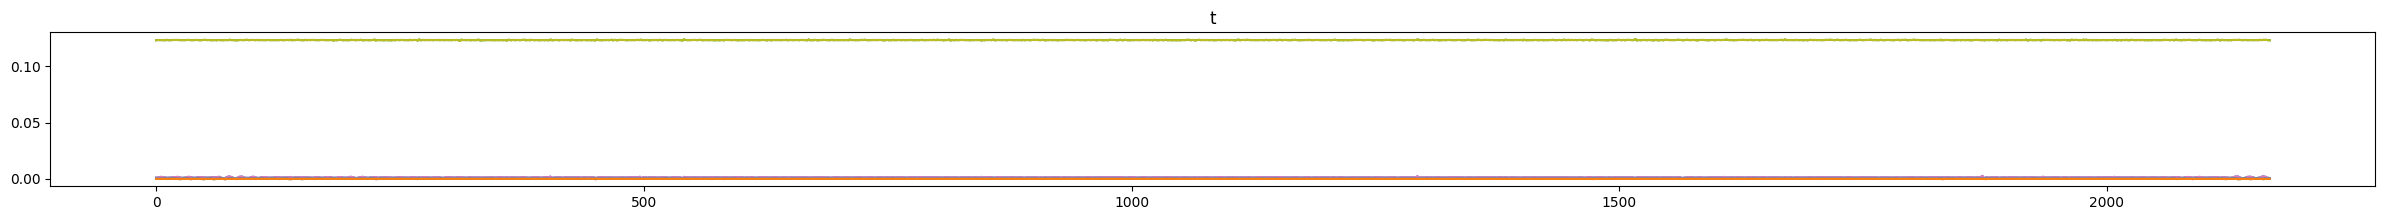

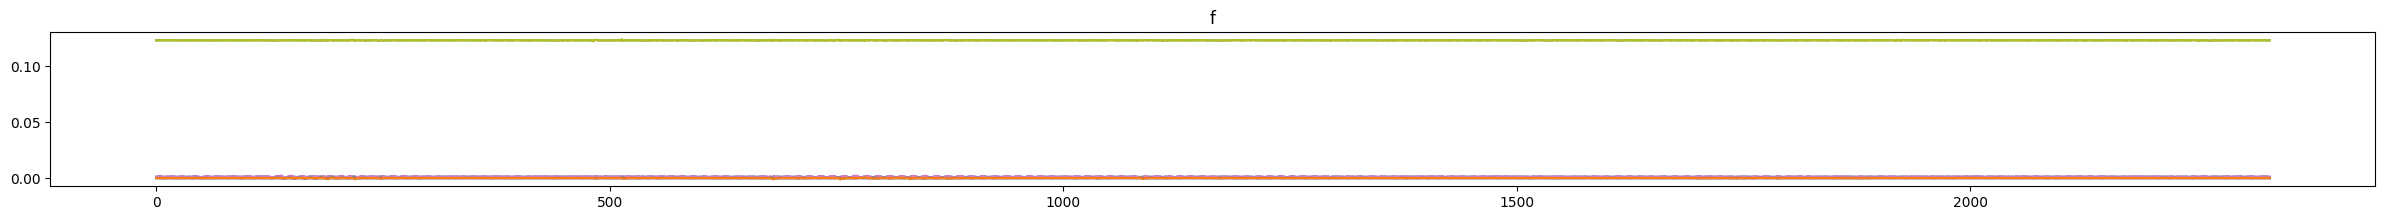

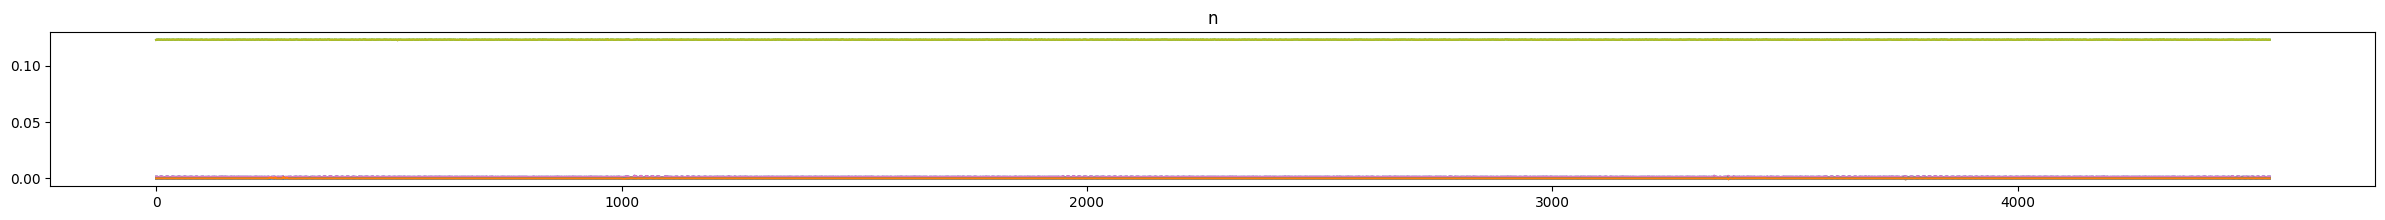

In [9]:
# visualize data from all gestures
for gesture_name, df in data.items():
    plt.figure(figsize=(30, 2))
    plt.title(gesture_name)
    plt.plot(df.values[:, :-1])
    plt.plot(df.values[:, :-1])
    plt.show()




### Training

In [10]:
# create windows of data, window size 50, overlap 49
window_size = 50
X = []
y = []
for gesture_name, df in data.items():
    df_values = df.values[:, :-1]
    label = gesture_name
    for i in range(0, len(df) - window_size, 1):
        X.append(df_values[i:i+window_size].flatten())
        y.append(label)
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)


(8892, 300) (8892,)


In [11]:
# split data into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7113, 300) (1779, 300) (7113,) (1779,)


1. ËæìÂÖ•Â±Ç
`Input(shape=(6 * window_size,))`

- ËæìÂÖ•ÂΩ¢Áä∂: (6 * window_size,)Ôºå‰æãÂ¶Ç (300,)ÔºàÂÅáËÆæ window_size=50Ôºå6 ‰∏™ IMU ÁâπÂæÅÔºâ„ÄÇ

- ‰ΩúÁî®: Êé•Êî∂Â±ïÂπ≥ÂêéÁöÑÊªëÂä®Á™óÂè£Êï∞ÊçÆÔºàÊØè‰∏™Á™óÂè£ÂåÖÂê´ 50 ‰∏™Êó∂Èó¥Ê≠• √ó 6 ‰∏™‰º†ÊÑüÂô®Áª¥Â∫¶ = 300 ‰∏™ÁâπÂæÅÔºâ„ÄÇ

2. ÂÖ®ËøûÊé•ÈöêËóèÂ±Ç
`Dense(64, activation='relu')`

- Á•ûÁªèÂÖÉÊï∞Èáè: 64

- ÊøÄÊ¥ªÂáΩÊï∞: ReLUÔºà‰øÆÊ≠£Á∫øÊÄßÂçïÂÖÉÔºâÔºåÂºïÂÖ•ÈùûÁ∫øÊÄßÔºåÂ∏ÆÂä©Ê®°ÂûãÂ≠¶‰π†Â§çÊùÇÊ®°Âºè„ÄÇ

- ÂèÇÊï∞Êï∞Èáè: (300 + 1) * 64 = 19,264Ôºà300 ËæìÂÖ•ÁâπÂæÅÔºå64 ‰∏™Á•ûÁªèÂÖÉÔºåÊØè‰∏™Á•ûÁªèÂÖÉÊúâ 1 ‰∏™ÂÅèÁΩÆÈ°πÔºâ„ÄÇ

3. ËæìÂá∫Â±Ç
`Dense(len(data.keys()), activation='softmax')`

- Á•ûÁªèÂÖÉÊï∞Èáè: Á≠â‰∫éÊâãÂäøÁ±ªÂà´Êï∞Ôºà‰æãÂ¶Ç data.keys() ËøîÂõû ['wave', 'circle', 'swipe']ÔºåÂàôÁ•ûÁªèÂÖÉÊï∞‰∏∫ 3Ôºâ„ÄÇ

- ÊøÄÊ¥ªÂáΩÊï∞: SoftmaxÔºåÂ∞ÜËæìÂá∫ËΩ¨Êç¢‰∏∫Ê¶ÇÁéáÂàÜÂ∏ÉÔºàÊâÄÊúâÁ±ªÂà´ÁöÑÊ¶ÇÁéá‰πãÂíå‰∏∫ 1Ôºâ„ÄÇ

- ÂèÇÊï∞Êï∞Èáè: (64 + 1) * num_classesÔºà‰æãÂ¶Ç 3 Á±ªÊó∂Êúâ (64+1)*3=195 ‰∏™ÂèÇÊï∞Ôºâ„ÄÇ

1. ‰ºòÂåñÂô® (Optimizer)  ‰ºòÂåñÂô® (Optimizer)
Adam(learning_rate=3e-4):

Ëá™ÈÄÇÂ∫îÂ≠¶‰π†ÁéáÁöÑ‰ºòÂåñÁÆóÊ≥ïÔºåÁªìÂêà‰∫ÜÂä®ÈáèÔºàMomentumÔºâÂíå RMSProp ÁöÑ‰ºòÁÇπ„ÄÇ

learning_rate=3e-4 ÊòØÂàùÂßãÂ≠¶‰π†ÁéáÔºåËæÉÂ∞èÁöÑÂÄºÈÄÇÂêàÁ≤æÁªÜË∞ÉÊï¥ÊùÉÈáç„ÄÇ

2. ÊçüÂ§±ÂáΩÊï∞ (Loss)
SparseCategoricalCrossentropy():

ÈÄÇÁî®‰∫éÂ§öÂàÜÁ±ª‰ªªÂä°Ôºå‰∏îÊ†áÁ≠æ‰∏∫Êï¥Êï∞ÂΩ¢ÂºèÔºà‰æãÂ¶Ç 0, 1, 2Ôºâ„ÄÇ

Â¶ÇÊûúÊòØ one-hot ÁºñÁ†ÅÊ†áÁ≠æÔºåÂ∫î‰ΩøÁî® CategoricalCrossentropy„ÄÇ

3. ËØÑ‰º∞ÊåáÊ†á (Metrics)
SparseCategoricalAccuracy(name='accuracy'):

ËÆ°ÁÆóÂàÜÁ±ªÂáÜÁ°ÆÁéáÔºåÊ≠£Á°ÆÈ¢ÑÊµãÁöÑÊ†∑Êú¨ÊØî‰æã„ÄÇ

ÂêåÊ†∑ÈÄÇÁî®‰∫éÊï¥Êï∞Ê†áÁ≠æ„ÄÇ

Ê®°ÂûãÊîπËøõÊÄùË∑Ø
Ë∞ÉÊï¥ÁΩëÁªúÁªìÊûÑ:

Â¢ûÂä†Êõ¥Â§öÈöêËóèÂ±ÇÔºàÂ¶ÇÂèñÊ∂àÊ≥®ÈáäÁöÑ Dense(64, activation='relu')Ôºâ„ÄÇ

Ê∑ªÂä† Dropout Â±ÇÈò≤Ê≠¢ËøáÊãüÂêàÔºö

python
keras.layers.Dropout(0.5)
‰ºòÂåñË∂ÖÂèÇÊï∞:

Ë∞ÉÊï¥Â≠¶‰π†ÁéáÔºàÂ¶Ç 1e-3 Êàñ 1e-4Ôºâ„ÄÇ

‰ΩøÁî®Â≠¶‰π†ÁéáË∞ÉÂ∫¶ÔºàÂ¶Ç ReduceLROnPlateauÔºâ„ÄÇ

Êï∞ÊçÆÂ¢ûÂº∫:

ÂØπ IMU Êï∞ÊçÆËøõË°åÈöèÊú∫Êâ∞Âä®ÔºàÂ¶ÇÊ∑ªÂä†Âô™Â£∞„ÄÅÊó∂Èó¥ÂÅèÁßªÔºâ‰ª•Â¢ûÂº∫È≤ÅÊ£íÊÄß„ÄÇ

In [12]:
# train a keras model
import keras

# ËÆæÁΩÆÊ®°ÂûãÁªìÊûÑ
model = keras.Sequential([
    keras.layers.Input(shape=(6 * window_size,)),  # ËæìÂÖ•Â±Ç
    keras.layers.Dense(64, activation='relu'),     # ÂÖ®ËøûÊé•ÈöêËóèÂ±Ç
    keras.layers.Dense(len(data.keys()), activation='softmax')  # ËæìÂá∫Â±Ç
])

print(model.summary())

# ÁºñËØëÊ®°Âûã
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=3e-4),  # ÈÄâÊã© Adam ‰ºòÂåñÂô®ÔºåÂ≠¶‰π†Áéá 3e-4
    loss=keras.losses.SparseCategoricalCrossentropy(),   # ‰∫§ÂèâÁÜµÊçüÂ§±ÂáΩÊï∞ÔºàÁî®‰∫éÂàÜÁ±ª‰ªªÂä°Ôºâ
    metrics=[keras.metrics.SparseCategoricalAccuracy(name='accuracy')]  # ËØÑ‰º∞ÊåáÊ†áÔºàÂáÜÁ°ÆÁéáÔºâ
)


2025-03-13 01:47:20.086093: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-03-13 01:47:20.086299: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-03-13 01:47:20.086316: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1741844840.086801 13390128 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1741844840.087097 13390128 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense (Dense)                   ‚îÇ (None, 64)             ‚îÇ        19,264 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 3)              ‚îÇ           195 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 19,459 (76.01 KB)

 Trainable params: 19,459 (76.01 KB)

 Non-trainable params: 0 (0.00 B)

None


üëâ callbacks ÊòØËÆ≠ÁªÉËøáÁ®ã‰∏≠ÁöÑ‚ÄúËá™Âä®Âä©Êâã‚ÄùÔºåÂèØ‰ª•Ëá™Âä®ÊâßË°å‰ªªÂä°ÔºåÊØîÂ¶Ç‰øùÂ≠òÊ®°Âûã„ÄÅÊèêÂâçÂÅúÊ≠¢ËÆ≠ÁªÉ„ÄÅË∞ÉÊï¥Â≠¶‰π†ÁéáÁ≠â„ÄÇ
üëâ ModelCheckpoint ÂèØ‰ª•Âú®ÊØè‰∏™ epoch ÁªìÊùüÂêé‰øùÂ≠òÊ®°ÂûãÔºåÈò≤Ê≠¢ÊÑèÂ§ñ‰∏¢Â§±ËÆ≠ÁªÉËøõÂ∫¶„ÄÇ
üëâ EarlyStopping ÁõëÊéß val_lossÔºåÂ¶ÇÊûú 2 ËΩÆ‰∏ç‰∏ãÈôçÂ∞±ÂÅúÊ≠¢ËÆ≠ÁªÉÔºåÈÅøÂÖçËøáÊãüÂêà„ÄÇ

Epoch 1/10


2025-03-13 01:47:20.630543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


189/189 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 13ms/step - accuracy: 0.4360 - loss: 1.0675 - val_accuracy: 0.5258 - val_loss: 1.0218
Epoch 2/10
189/189 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5052 - loss: 1.0357 - val_accuracy: 0.5258 - val_loss: 1.0211
Epoch 3/10
189/189 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5073 - loss: 1.0346 - val_accuracy: 0.5258 - val_loss: 1.0224
Epoch 4/10
189/189 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.4985 - loss: 1.0404 - val_accuracy: 0.5258 - val_loss: 1.0215


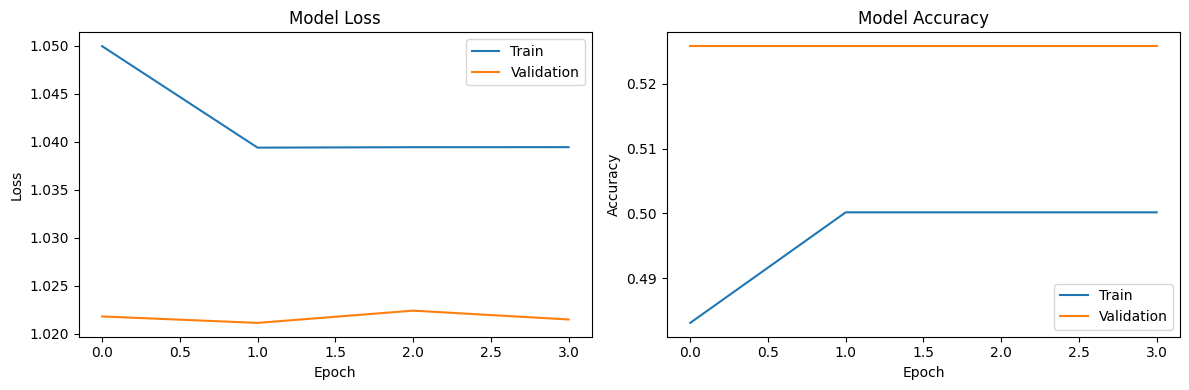

In [13]:
batch_size = 32 # ‰∏ÄÊ¨°ËÆ≠ÁªÉÁî®Â§öÂ∞ëÊï∞ÊçÆ
epochs = 10 # Êï∞ÊçÆÈõÜË¢´ÈÅçÂéÜÂ§öÂ∞ëÊ¨°

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="./checkpoints/model_at_epoch_{epoch}.keras"),# ÊØèËΩÆ‰øùÂ≠òÊ®°Âûã
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=2),# Èò≤Ê≠¢ËøáÊãüÂêàÁöÑÊúâÊïàÊé™ÊñΩÔºàÂΩìÈ™åËØÅÊçüÂ§±ËøûÁª≠2ËΩÆÊú™ÊîπÂñÑÊó∂ÁªàÊ≠¢ËÆ≠ÁªÉÔºâ
]

history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15, #Ëá™Âä®‰øùÁïô15%ËÆ≠ÁªÉÊï∞ÊçÆ‰Ωú‰∏∫È™åËØÅÈõÜÔºåÁî®‰∫éÁõëÊéßÊ®°ÂûãÊ≥õÂåñËÉΩÂäõÔºõ
    callbacks=callbacks,
)

score = model.evaluate(X_test, y_test, verbose=0)# ÈùôÈªòÊ®°ÂºèËØÑ‰º∞ÊµãËØïÈõÜ

# Plot training & validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

### Evaluation

In [14]:
print(f"Test loss: {score[0]:.4f}", f"Test accuracy: {score[1]:.4f}")

Test loss: 1.0333 Test accuracy: 0.5104


In [15]:
'_'.join(sorted(data.keys()))

'f_n_t'

### Saving

In [16]:
# save the model
import pickle
import time

# make the model name based on the gesture names
run_timestamp = str(time.time()).replace(".", "-")
model_name = '_'.join(sorted(data.keys())) + "__" + run_timestamp

# make a model directory
model_dir = Path('./models')
model_dir.mkdir(parents=True, exist_ok=True)

with open(model_dir / f'{model_name}.keras', 'wb') as f:
    pickle.dump(model, f)
with open(model_dir / f'label_encoder_{model_name}.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [17]:
model_name

'f_n_t__1741844850-225251'

In [18]:
model.predict(X_test[[0]])

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 51ms/step


array([[0.2643526 , 0.49773437, 0.23791315]], dtype=float32)

In [19]:
X_test.shape

(1779, 300)